In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train.head(2)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

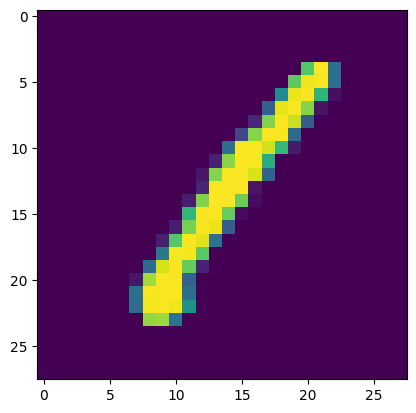

In [6]:
plt.imshow(train.iloc[0, 1:].values.reshape(28,28))

In [7]:
train['label']

# this is outcome or predicted data

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

# Train test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = train.drop('label', axis = 1).values
y = train['label'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [10]:
print(x.shape, 'and', y.shape)

(42000, 784) and (42000,)


In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False) 
y_train_encoded = ohe.fit_transform(pd.DataFrame(y_train))
y_test_encoded = ohe.transform(pd.DataFrame(y_test))

In [12]:
y_train.shape

(33600,)

In [13]:
y_train_encoded.shape 
# categories 0-9 (total 10)

(33600, 10)

# Scaling the image pixels b/w 0 to 1

In [14]:
print(x_train.max(), 'and', x_train.min())

255 and 0


In [15]:
x_train = x_train/255
x_test = x_test/255


# Deep learning

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

2025-08-02 20:20:16.799893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754166017.048763      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754166017.129916      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
x_train.shape

(33600, 784)

In [18]:
model.add(Dense(128,'relu',input_shape=(784,)))
model.add(Dense(64,'relu'))
model.add(Dense(32,'relu'))
model.add(Dense(10,'softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-02 20:20:32.726605: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(mode = 'min', patience = 2)

In [21]:
#model.fit(x_train, y_train_encoded, validation_data = (x_test, y_test_encoded), epochs = 20)

In [22]:
model.fit(x_train,y_train_encoded,validation_data=(x_test,y_test_encoded),epochs=20,callbacks=[early_stop])

Epoch 1/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8210 - loss: 0.5692 - val_accuracy: 0.9463 - val_loss: 0.1832
Epoch 2/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9615 - loss: 0.1277 - val_accuracy: 0.9570 - val_loss: 0.1347
Epoch 3/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9733 - loss: 0.0867 - val_accuracy: 0.9661 - val_loss: 0.1170
Epoch 4/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9793 - loss: 0.0631 - val_accuracy: 0.9685 - val_loss: 0.1061
Epoch 5/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9844 - loss: 0.0465 - val_accuracy: 0.9649 - val_loss: 0.1172
Epoch 6/20
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9864 - loss: 0.0414 - val_accuracy: 0.9685 - val_loss: 0.1141


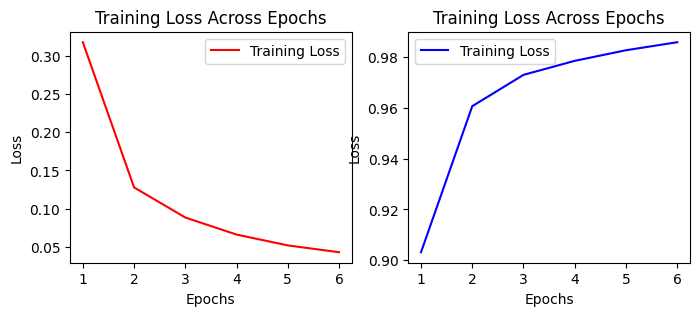

In [23]:
plt.figure(figsize = (8,3))
epochs = range(1,len(model.history.history['loss'])+1)
plt.subplot(1,2,1)
plt.plot(epochs, model.history.history['loss'], label='Training Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Across Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, model.history.history['accuracy'], label='Training Loss', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Across Epochs')
plt.legend()

plt.subplot
plt.show()

<Axes: >

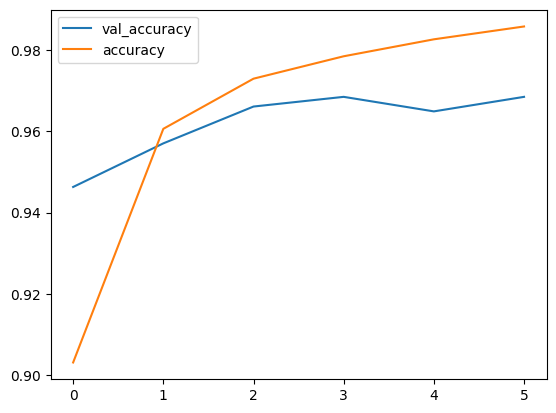

In [24]:
pd.DataFrame({
    'val_accuracy':model.history.history['val_accuracy'],
    'accuracy':model.history.history['accuracy']
}).plot()

In [25]:
prediction = np.argmax(model.predict(x_test), axis = 1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [26]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [27]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       789
           1       0.99      0.98      0.99       948
           2       0.97      0.97      0.97       859
           3       0.96      0.96      0.96       859
           4       0.96      0.98      0.97       818
           5       0.96      0.97      0.96       733
           6       0.97      0.99      0.98       824
           7       0.95      0.99      0.97       873
           8       0.96      0.96      0.96       820
           9       0.99      0.90      0.94       877

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



<Figure size 1000x600 with 0 Axes>

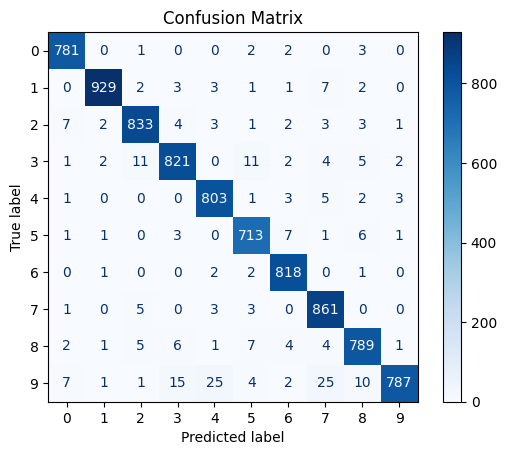

In [28]:
plt.figure(figsize=(10,6))
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, prediction))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

**Testing it**

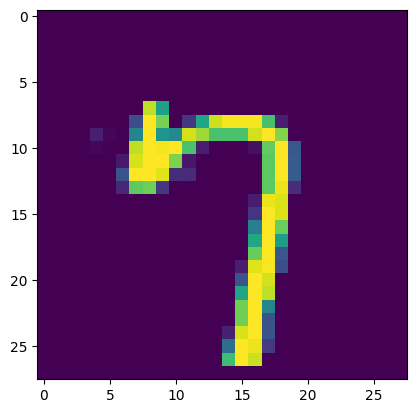

In [29]:
plt.imshow(x[2235].reshape(28,28))

In [30]:
pred = np.argmax(model.predict(np.expand_dims(x[2235], axis=0)), axis=1)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([7])